In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [4]:
df = pd.read_csv("/content/crime_safety_dataset.csv")

In [5]:
df.head(10)

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other
5,6,2021-09-30,03:17:56,Drug Offense,Chicago,IL,635 Oak St,70,Non-binary,Other
6,7,2024-11-22,08:41:48,Homicide,Philadelphia,PA,2725 Pine St,48,Other,Asian
7,8,2023-12-09,08:10:36,Drug Offense,Houston,TX,457 Pine St,47,Non-binary,Asian
8,9,2020-08-06,04:13:54,Fraud,Houston,TX,7584 Oak St,28,Other,Black
9,10,2024-04-09,07:18:22,Domestic Violence,San Diego,CA,9233 Main St,44,Female,White


In [6]:
def clean_df(df: pd.DataFrame):

  df['date'] = pd.to_datetime(df['date'])
  df['time'] = pd.to_datetime(df['time'],format='%H:%M:%S').dt.time
  df['victim_age'] = np.array(df['victim_age'], dtype = np.float32)

  df = df.set_index(df['id'])
  df.drop(columns=['id'], inplace = True)

  return df

In [7]:
df = clean_df(df)

In [8]:
df.head(10)

,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
id,,,,,,,,,
1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34.0,Male,Other
2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13.0,Female,Black
3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23.0,Male,Asian
4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36.0,Other,Asian
5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26.0,Other,Other
6,2021-09-30,03:17:56,Drug Offense,Chicago,IL,635 Oak St,70.0,Non-binary,Other
7,2024-11-22,08:41:48,Homicide,Philadelphia,PA,2725 Pine St,48.0,Other,Asian
8,2023-12-09,08:10:36,Drug Offense,Houston,TX,457 Pine St,47.0,Non-binary,Asian
9,2020-08-06,04:13:54,Fraud,Houston,TX,7584 Oak St,28.0,Other,Black


In [9]:
date_range = df['date'].max() - df['date'].min()
print(f"{date_range} \nRange: {df['date'].min().date()} - {df['date'].max().date()}")

1821 days 00:00:00 
Range: 2020-07-31 - 2025-07-26


In [10]:
df['victim_age'].describe()

,victim_age
count,1000.000000
mean,52.201000
std,22.913832
min,12.000000
25%,33.000000
50%,53.000000
75%,72.000000
max,90.000000


In [11]:
for col in ['crime_type', 'city', 'state', 'victim_gender', 'victim_race']:
  print(f"Distribution for {col}:\n{df[col].nunique()}",df[col].value_counts(), "\n")

Distribution for crime_type:
10 crime_type
Domestic Violence    121
Burglary             121
Robbery              101
Homicide             101
Arson                 98
Assault               97
Vandalism             94
Fraud                 89
Drug Offense          89
Theft                 89
Name: count, dtype: int64 

Distribution for city:
10 city
Dallas          106
Houston         106
New York        105
Los Angeles     102
Chicago         101
Philadelphia     99
Phoenix          98
San Jose         97
San Antonio      95
San Diego        91
Name: count, dtype: int64 

Distribution for state:
6 state
TX    307
CA    290
NY    105
IL    101
PA     99
AZ     98
Name: count, dtype: int64 

Distribution for victim_gender:
4 victim_gender
Male          272
Female        259
Other         237
Non-binary    232
Name: count, dtype: int64 

Distribution for victim_race:
5 victim_race
Other       211
Asian       211
White       206
Hispanic    187
Black       185
Name: count, dtype: int64 



In [12]:
df_copy = df.copy()

In [13]:
df_copy['month'] = df['date'].dt.month
df_copy['month_name'] = df['date'].dt.month_name()

In [14]:
crimes_by_month = df_copy.groupby('month').size()

crimes_by_month = crimes_by_month.reset_index(name = 'count')
crimes_by_month['month_name'] = crimes_by_month['month'].apply(lambda x: calendar.month_name[x])

[]

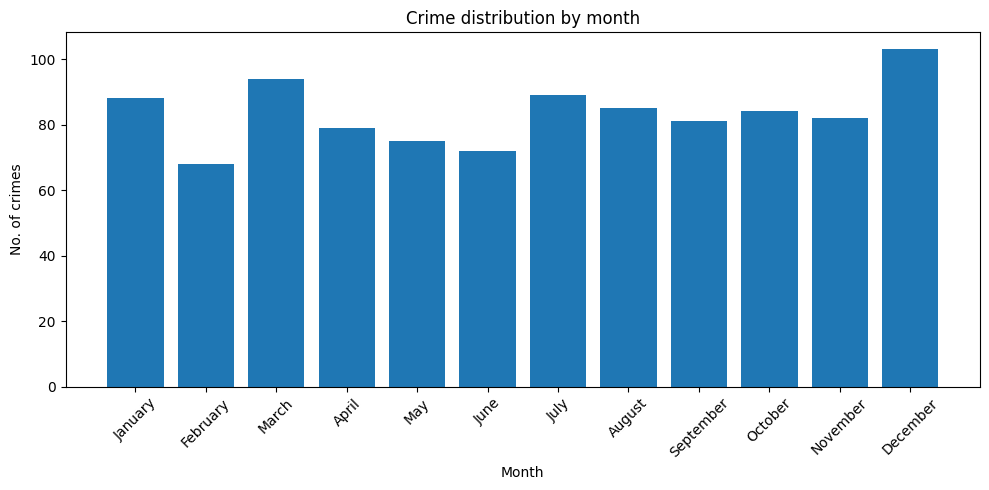

In [15]:
plt.figure(figsize = (10,5))
plt.bar(crimes_by_month['month_name'], crimes_by_month['count'])
plt.title('Crime distribution by month')
plt.xlabel('Month')
plt.ylabel('No. of crimes')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.plot()

In [16]:
df_copy['day'] = df['date'].dt.day_name()

<Axes: title={'center': 'Crimes by days of the week'}, xlabel='day'>

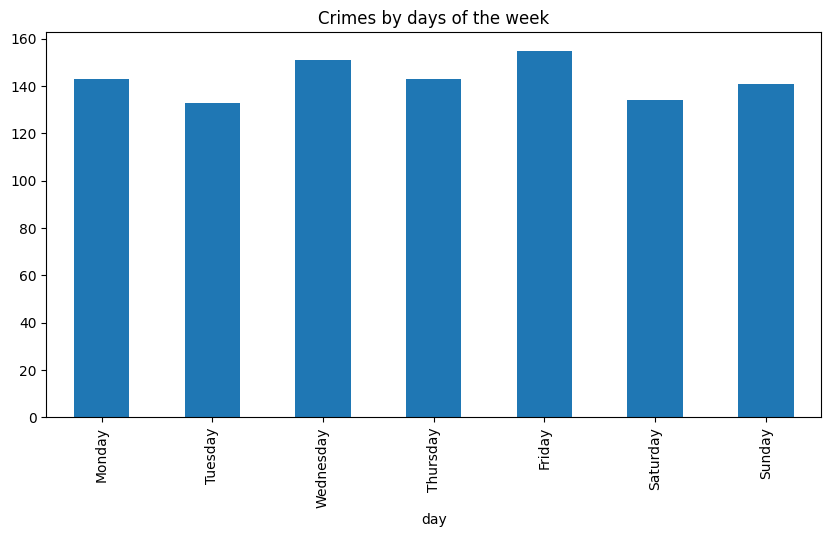

In [17]:
crimes_by_day = df_copy['day'].value_counts()

ordered_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_by_day = crimes_by_day.reindex(ordered_day)

crimes_by_day.plot(kind = 'bar', figsize = (10, 5), title = "Crimes by days of the week")

In [18]:
import datetime as dt

def get_period(t):
  if dt.time(6,0,0) <= t < dt.time(18,0,0):
    return 'Day'
  else:
    return 'Night'

df_copy['period'] = df['time'].apply(get_period)

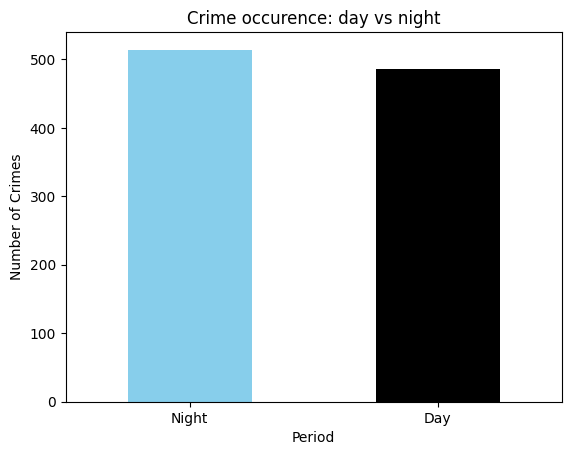

In [20]:
df_copy['period'].value_counts().plot(kind = 'bar', color = ['skyblue', 'black'])
plt.title('Crime occurence: day vs night')
plt.xlabel('Period')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 0)
plt.show()

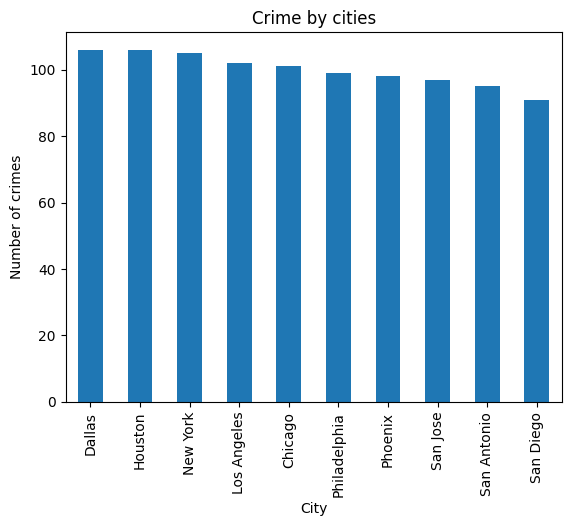

In [25]:
df['city'].value_counts().plot(kind = 'bar')
plt.title('Crime by cities')
plt.xlabel('City')
plt.ylabel('Number of crimes')
plt.show()

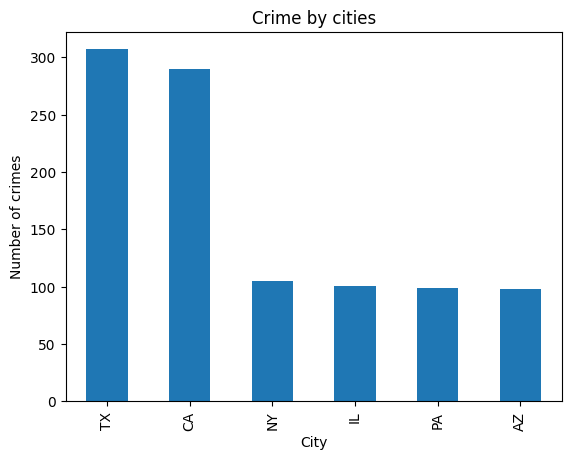

In [26]:
df['state'].value_counts().plot(kind = 'bar')
plt.title('Crime by cities')
plt.xlabel('City')
plt.ylabel('Number of crimes')
plt.show()

In [33]:
crime_counts = df.groupby(['state', 'crime_type']).size().reset_index(name='count')

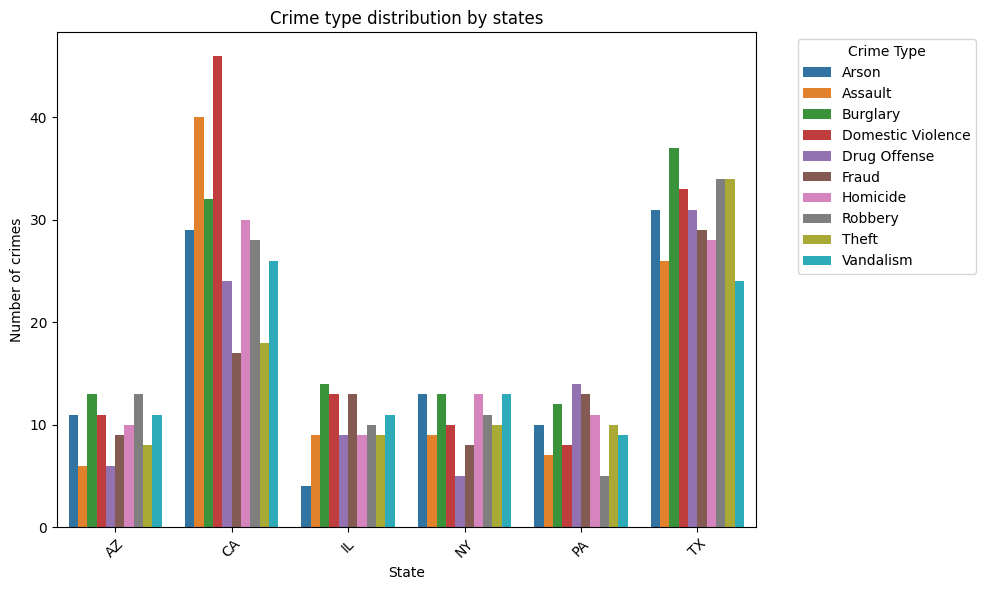

In [34]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.barplot(data = crime_counts, x = 'state', y = 'count', hue = 'crime_type')
plt.title('Crime type distribution by states')
plt.xlabel('State')
plt.ylabel('Number of crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='victim_age'>

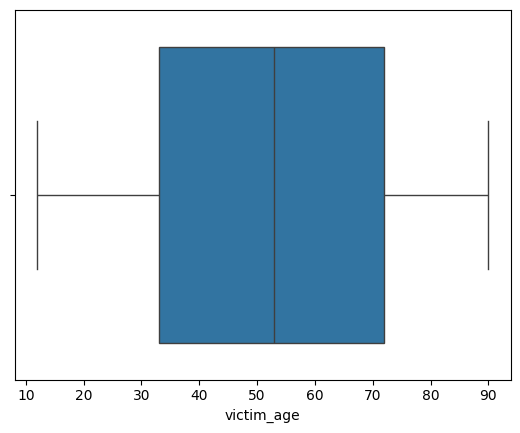

In [35]:
sns.boxplot(x=df['victim_age'])

In [49]:
def get_age(age):
  if age < 13:
    return 'Child'
  elif age > 13 and age < 20:
    return 'teen'
  elif age > 20 and age < 60:
    return 'adult'
  elif age > 60:
    return 'Elderly person'
  else:
    return np.nan

df_copy['age_type'] = df['victim_age'].apply(get_age)

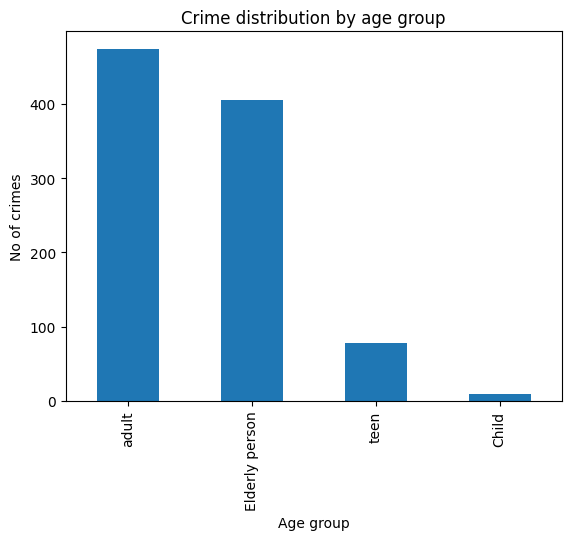

In [50]:
df_copy['age_type'].value_counts().plot(kind = 'bar')
plt.title('Crime distribution by age group')
plt.xlabel('Age group')
plt.ylabel('No of crimes')
plt.show()

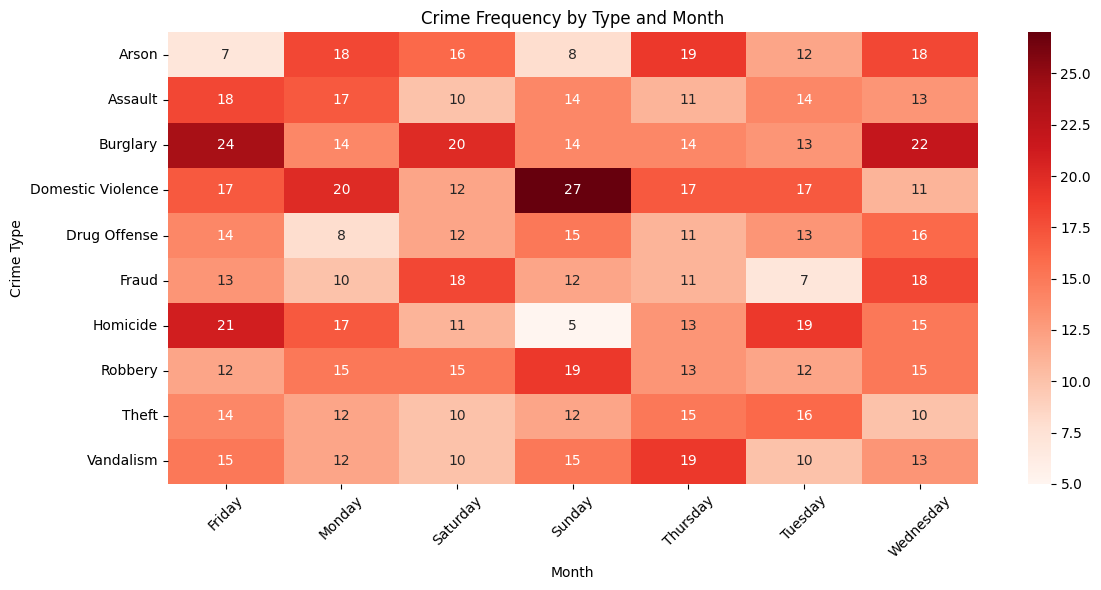

In [54]:
pivot = df_copy.pivot_table(index = 'crime_type', columns ='day', aggfunc='size', fill_value = 0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Reds')
plt.title('Crime Frequency by Type and Month')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

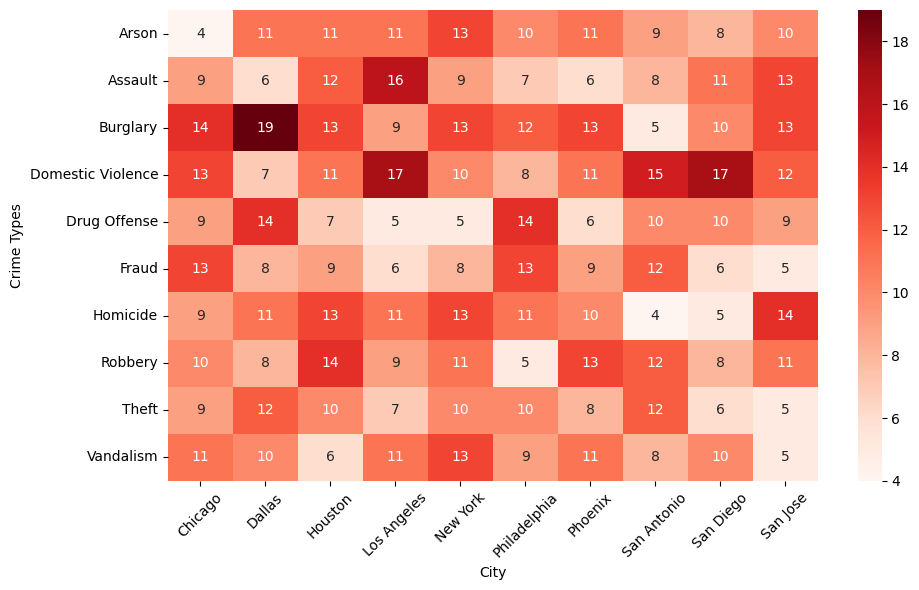

In [56]:
pivot = df_copy.pivot_table(index = 'crime_type', columns = 'city', aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (10,6))
sns.heatmap(pivot, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('City')
plt.ylabel('Crime Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
df_copy['age_type'].value_counts(normalize=True) * 100

,proportion
age_type,
adult,49.068323
Elderly person,41.925466
teen,8.074534
Child,0.931677
